In [54]:
import pandas as pd
data_path = "../data/raw_analyst_ratings.csv"
df = pd.read_csv(data_path)

df_stock = pd.read_csv('../data/TSLA_historical_data.csv')
print(df.head())
print(df.columns)
print(df_stock.head())
print(df_stock.columns)

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [52]:
print(df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [73]:
import pandas as pd

# Standardize column names to lowercase
df.columns = df.columns.str.lower()
df_stock.columns = df_stock.columns.str.lower()

# Fix 'date' parsing in news_data
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

# Fix 'date' parsing in stock_data
df_stock['date'] = pd.to_datetime(df_stock['date'], errors='coerce').dt.date

# Filter necessary columns
df = df[['date', 'headline']].copy()
df_stock = df_stock[['date', 'close']].copy()

# Check for invalid or missing dates
print("Invalid News Dates:", df['date'].isna().sum())
print("Invalid Stock Dates:", df_stock['date'].isna().sum())

# Verify the outputs
print("News Data Sample:")
print(df.head())
print("Stock Data Sample:")
print(df_stock.head())


Invalid News Dates: 1351341
Invalid Stock Dates: 0
News Data Sample:
         date                                           headline
0  2020-06-05            Stocks That Hit 52-Week Highs On Friday
1  2020-06-03         Stocks That Hit 52-Week Highs On Wednesday
2  2020-05-26                      71 Biggest Movers From Friday
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...
Stock Data Sample:
         date     close
1  2010-06-30  1.588667
2  2010-07-01  1.464000
3  2010-07-02  1.280000
4  2010-07-06  1.074000
5  2010-07-07  1.053333


In [74]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment_vader(text):
    if not isinstance(text, str):
        return 0  # Neutral sentiment for missing values
    return analyzer.polarity_scores(text)['compound']  # Compound sentiment score

# Apply sentiment analysis
df['sentiment'] = df['headline'].apply(get_sentiment_vader)

# Display results
print(df.head())
print(df.tail())

         date                                           headline  sentiment
0  2020-06-05            Stocks That Hit 52-Week Highs On Friday      0.000
1  2020-06-03         Stocks That Hit 52-Week Highs On Wednesday      0.000
2  2020-05-26                      71 Biggest Movers From Friday      0.000
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session      0.000
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...      0.296
        date                                           headline  sentiment
1407323  NaT             Top Narrow Based Indexes For August 29     0.2023
1407324  NaT  Recap: Wednesday's Top Percentage Gainers and ...    -0.3818
1407325  NaT  UPDATE: Oppenheimer Color on China Zenix Auto ...     0.0000
1407326  NaT  Oppenheimer Initiates China Zenix At Outperfor...     0.0000
1407327  NaT  China Zenix Auto International Opens For Tradi...     0.0000


In [76]:
# Aggregate sentiment scores to compute the average sentiment per day
daily_sentiment = df.groupby('date')['sentiment'].mean().reset_index()

# Display the aggregated sentiment scores
print(daily_sentiment.head())


         date  sentiment
0  2011-04-27    0.00000
1  2011-04-28    0.12500
2  2011-04-29    0.36755
3  2011-04-30    0.20230
4  2011-05-01    0.00000


In [77]:
# Calculate daily returns
df_stock['Daily_Return'] = df_stock['close'].pct_change()

# Drop NA values caused by pct_change
df_stock.dropna(inplace=True)

print(df_stock.head())

         date     close  Daily_Return
2  2010-07-01  1.464000     -0.078473
3  2010-07-02  1.280000     -0.125683
4  2010-07-06  1.074000     -0.160937
5  2010-07-07  1.053333     -0.019243
6  2010-07-08  1.164000      0.105064


In [79]:
# Merge the daily sentiment scores with stock data on 'date'
merged_data = pd.merge(df_stock, daily_sentiment, on='date', how='inner')

# Display the merged data
print(merged_data.head())
print(merged_data.tail())


         date     close  Daily_Return  sentiment
0  2011-04-27  1.805333      0.005570   0.000000
1  2011-04-28  1.844000      0.021418   0.125000
2  2011-04-29  1.840000     -0.002169   0.367550
3  2011-05-02  1.830000     -0.005435   0.136444
4  2011-05-03  1.791333     -0.021130   0.000000
            date      close  Daily_Return  sentiment
2221  2020-06-05  59.043999      0.024619   0.499182
2222  2020-06-08  63.327999      0.072556   0.250540
2223  2020-06-09  62.711334     -0.009738   0.283041
2224  2020-06-10  68.336670      0.089702   0.044075
2225  2020-06-11  64.856003     -0.050934   0.123685


In [81]:
# Aggregate sentiment by date, computing the mean sentiment score for each day
merged_data['Daily_Sentiment'] = merged_data.groupby(merged_data.index)['sentiment'].transform('mean')

# Check the aggregated sentiment scores
print(merged_data[['Daily_Sentiment', 'Daily_Return']].head())


   Daily_Sentiment  Daily_Return
0         0.000000      0.005570
1         0.125000      0.021418
2         0.367550     -0.002169
3         0.136444     -0.005435
4         0.000000     -0.021130


In [83]:
# Calculate the Pearson correlation between daily sentiment and daily returns
correlation = merged_data[ 'Daily_Return'].corr(merged_data['sentiment'])

# Print the correlation matrix
print("Correlation Matrix between Daily Sentiment and Daily Returns:")
print(correlation)


Correlation Matrix between Daily Sentiment and Daily Returns:
-0.013865445229882208


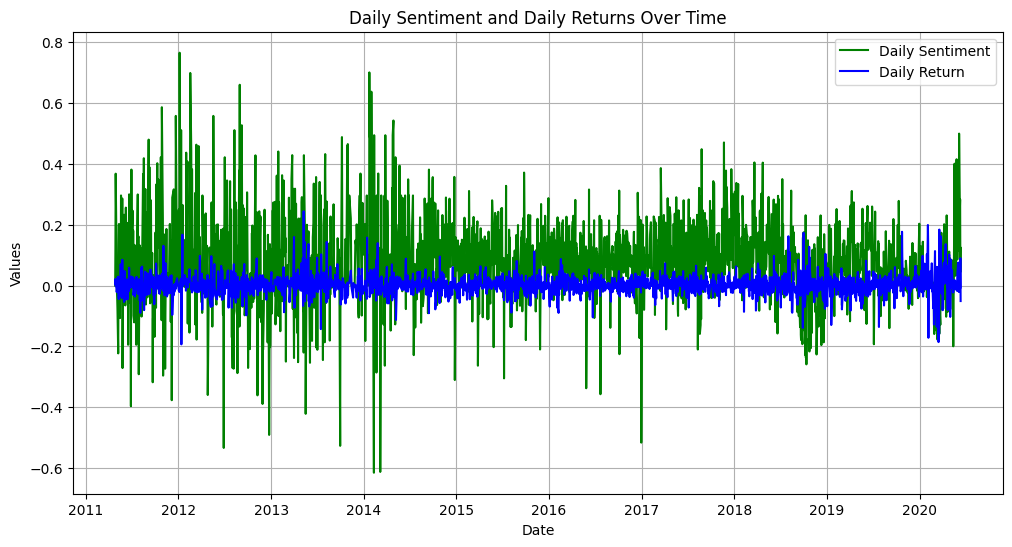

In [85]:
# Line plot of Daily Sentiment and Daily Returns over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['Daily_Sentiment'], label='Daily Sentiment', color='green')
plt.plot(merged_data['date'], merged_data['Daily_Return'], label='Daily Return', color='blue')
plt.title('Daily Sentiment and Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


C:\Users\lemlem\AppData\Local\Temp\ipykernel_12736\568738891.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_groups =merged_data.groupby(pd.cut(merged_data['sentiment'], bins=5))['Daily_Return'].mean()
C:\Users\lemlem\AppData\Local\Temp\ipykernel_12736\568738891.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='Daily_Return', data=sentiment_groups, palette='coolwarm')


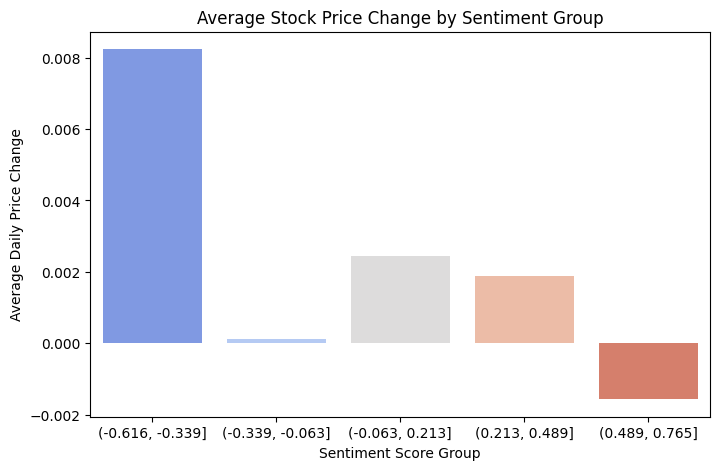

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by sentiment ranges and calculate the average price change
sentiment_groups =merged_data.groupby(pd.cut(merged_data['sentiment'], bins=5))['Daily_Return'].mean()

# Reset the index for better plotting
sentiment_groups = sentiment_groups.reset_index()

# Plotting using Seaborn for a more visually appealing bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='sentiment', y='Daily_Return', data=sentiment_groups, palette='coolwarm')

# Set the title and labels
plt.title("Average Stock Price Change by Sentiment Group")
plt.xlabel("Sentiment Score Group")
plt.ylabel("Average Daily Price Change")

# Show the plot
plt.show()